In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# Load Dataset
df = pd.read_csv("../Data/heart.csv")
print(df.shape)
df.head()

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)

C:\Users\91932\AppData\Local\Temp\ipykernel_4480\1165461563.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


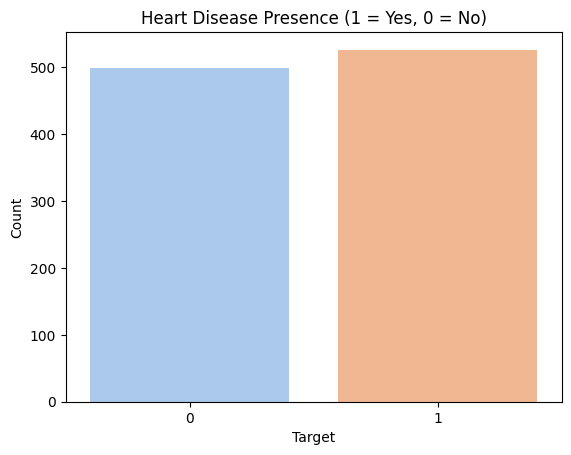

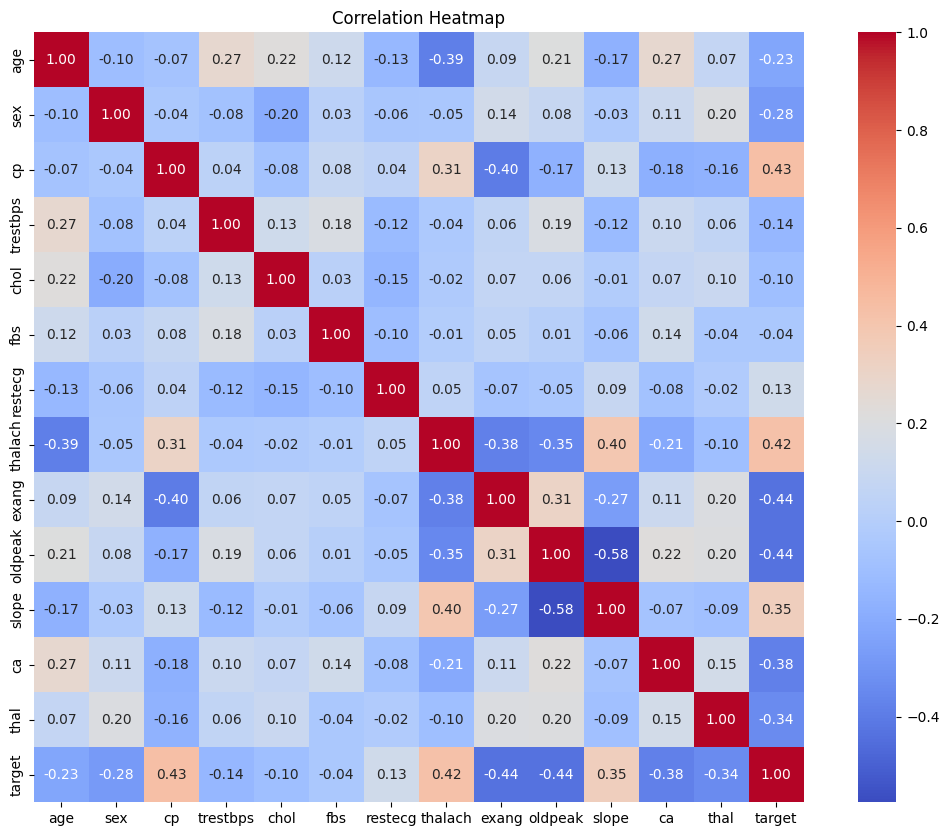

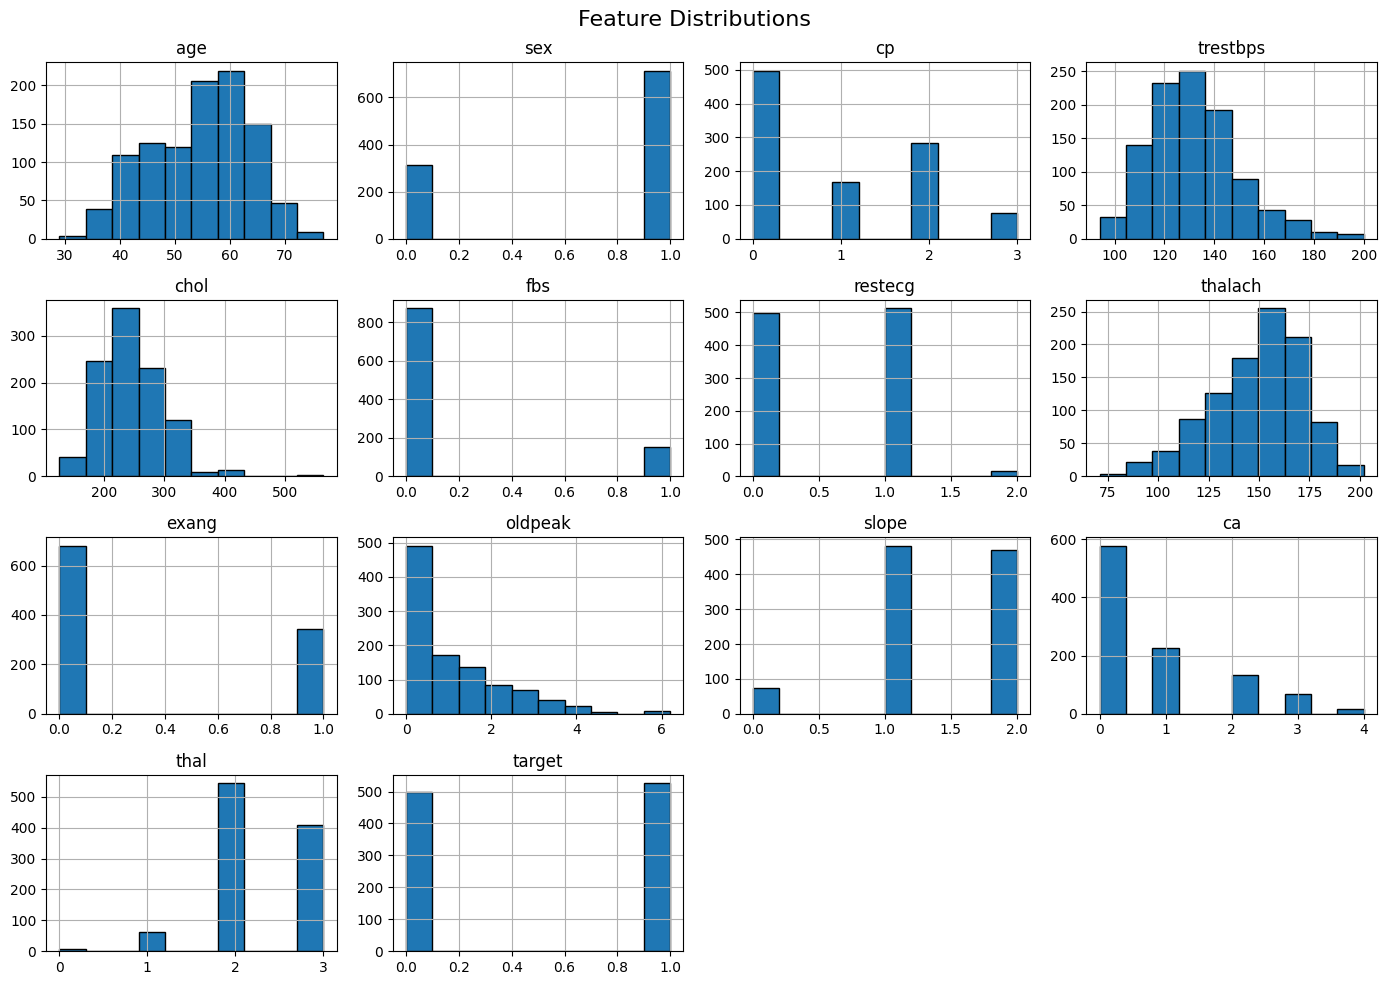

In [6]:
# Exploratory Data Analysis (EDA)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Data types and structure
print("\nData Info:\n")
df.info()

# Descriptive statistics
print("\nSummary Stats:\n")
print(df.describe())

# Target distribution
sns.countplot(x='target', data=df, palette='pastel')
plt.title("Heart Disease Presence (1 = Yes, 0 = No)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Histograms for feature distribution
df.hist(figsize=(14, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
# Preprocessing of data

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Normalize/Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 820
Test samples: 205


Training of multiple models and selecting the best model according to different performance metrics

In [8]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)
import os

In [9]:
# Loading the dataset
df = pd.read_csv("../Data/heart.csv")
X = df.drop("target", axis=1)
y = df["target"]

In [10]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

In [12]:
# Train, evaluate, and select best model
best_model = None
best_score = 0
best_model_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 0

    print(f"\nModel: {name}")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall:", round(rec, 4))
    print("F1 Score:", round(f1, 4))
    print("ROC AUC:", round(roc_auc, 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    if roc_auc > best_score:
        best_score = roc_auc
        best_model = model
        best_model_name = name


Model: Logistic Regression
Accuracy: 0.8098
Precision: 0.7619
Recall: 0.9143
F1 Score: 0.8312
ROC AUC: 0.9297

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205


Model: Random Forest
Accuracy: 0.9268
Precision: 0.8947
Recall: 0.9714
F1 Score: 0.9315
ROC AUC: 0.9761

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       100
           1       0.89      0.97      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205


Model: SVM
Accuracy: 0.922
Precision: 0.9083
Recall: 0.9429
F1 Score: 0.9252
RO

In [13]:
# Save the best model
os.makedirs("../models", exist_ok=True)

with open("../models/heart_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"\nBest model '{best_model_name}' saved to models/heart_model.pkl with ROC AUC: {best_score:.4f}")


Best model 'SVM' saved to models/heart_model.pkl with ROC AUC: 0.9771
